[0]	validation_0-logloss:0.57049
[1]	validation_0-logloss:0.53789
[2]	validation_0-logloss:0.51824
[3]	validation_0-logloss:0.52544
[4]	validation_0-logloss:0.52078
[5]	validation_0-logloss:0.51650
[6]	validation_0-logloss:0.51318
[7]	validation_0-logloss:0.52562
[8]	validation_0-logloss:0.52997
[9]	validation_0-logloss:0.53148
[10]	validation_0-logloss:0.53331
[11]	validation_0-logloss:0.54113
[12]	validation_0-logloss:0.55273
[13]	validation_0-logloss:0.56011
[14]	validation_0-logloss:0.57130
[15]	validation_0-logloss:0.58105
[16]	validation_0-logloss:0.59047


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 75.97%


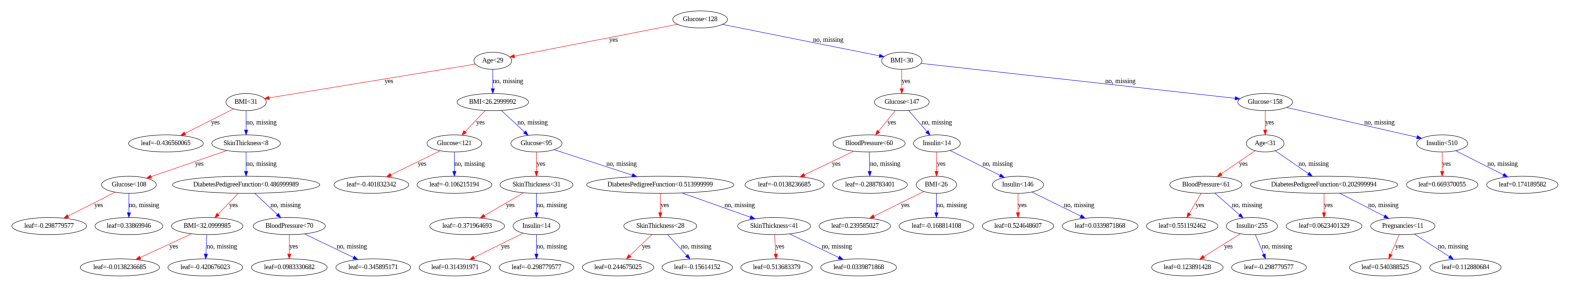

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#loading data into dataframe
df=pd.read_csv('diabetes.csv')

#splitting the dataset
#X - Features (all columns except the last one)
#Y - Target variable (last column)
X=df.iloc[:,0:8]
Y=df.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#fitting model on training data
model=XGBClassifier()
eval_set=[(X_test,y_test)]
#early_stopping_rounds=10 --- Stops training if performance doesn't improve for 10 consecutive rounds
#eval_metric='logloss'--- Uses log loss as the evaluation metric
model.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='logloss',eval_set=eval_set,verbose=True)

#making predictions for test data
predictions=model.predict(X_test)

#evalaute predictions
accuracy=accuracy_score(y_test,predictions)
#accuracy --- Calculates the accuracy of the model by comparing y_test (true labels) and predictions (predicted labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#printing xgboost tree
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_tree(model,ax=plt.gca());